---
title: "Week 7 - Regression and Correlation"
date: 2024-05-16
date-format: full
author:
    - name:
          given: Pranav Kumar
          family: Mishra
      affiliations:
          - ref: rushsurg
          - ref: rushortho
      corresponding: true
      url: https://drpranavmishra.com
      email: pranav_k_mishra@rush.edu
      orcid: 0000-0001-5219-6269
      role: "Post Doctoral Research Fellow"

execute:
    enabled: false
    echo: true
    output: true
---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Math, Latex

from scipy import stats
import math

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults

import pingouin as pg

![](https://prwatech.in/blog/wp-content/uploads/2019/07/type1error.png)


![](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/sas/sas4-onesamplettest/Figure1.PNG)

## Estimating $\alpha$ and $\beta$ by the least squares criterion


We want to chose an *a* and *b* to minimize:

$$
\sum_{i=1}^{n} [y_i - (a + bx_i)]^{2}
$$


### Normal equations

(Not the normal distributions, but just a mathematical name).


$ \sum y_i = na + b\sum x_i  $

$ \sum x_i y_i = a \sum x_i + b \sum {x_i}^2 $


Residual:
$
e_i = y_i - \hat{y_i} = y_i - (a + bx_i)
$

$
s_{y,x} = \sqrt{\frac{\sum (y_i - \hat{y}_i)^2} {n-2}}  \approx \sigma _ {y,x}
$, where $s_{y,x}$ is an estimate of $\sigma _ {y,x}$

### Test and Confidence Intervals

Under the null hypothesis, $\beta = 0$

$
t = \frac{b}{s_b}
$ has a $t$ distribution on $n-2$ degrees of freedom

A $1-\alpha$ confidence interval for $\beta$ is given by:

$$
b \pm = t_\alpha s_b
$$

Intercept:

$
t = \frac{a}{s_a}
$
and 
$
a \pm t_\alpha s_a
$

In [19]:
age_kidney_json  = {
    2: [20],
    3: [18],
    4: [22, 25],
    5: [17, 20, 20, 22],
    6: [21, 22],
    7: [20, 20, 22, 24],
    8: [18, 25, 33],
    9: [27, 31],
    10: [18, 24, 34],
    11: [25, 28]
}

age_kidney_df = pd.DataFrame([(age, length) for age, lengths in age_kidney_json.items() for length in lengths],
                  columns=["age", "length"])

age_kidney_df

,age,length
0,2,20
1,3,18
2,4,22
3,4,25
4,5,17
5,5,20
6,5,20
7,5,22
8,6,21
9,6,22


In [20]:
X = age_kidney_df['age']
y = age_kidney_df['length']

In [21]:
# Add a constant term to the predictor variable (age)
X = sm.add_constant(X)

In [22]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 length   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     8.113
Date:                Thu, 16 May 2024   Prob (F-statistic):            0.00935
Time:                        18:17:12   Log-Likelihood:                -66.806
No. Observations:                  24   AIC:                             137.6
Df Residuals:                      22   BIC:                             140.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4826      2.491      6.618      0.000      11.317      21.648
age            0.9606      0.337      2.848      0.009       0.261       1.660
==============================================================================
Omnibus:                        1.516   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.667
Skew:                           0.396   Prob(JB):                        0.716
Kurtosis:                       3.199   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
intercept, slope = model.params['const'], model.params['age']

print(f"Intercept (b0): {intercept:.2f}")
print(f"Slope (b1): {slope:.2f}")

Intercept (b0): 16.48
Slope (b1): 0.96


In [25]:
confidence_intervals = model.conf_int()
confidence_intervals

,0,1
const,11.317180,21.647946
age,0.261169,1.660010


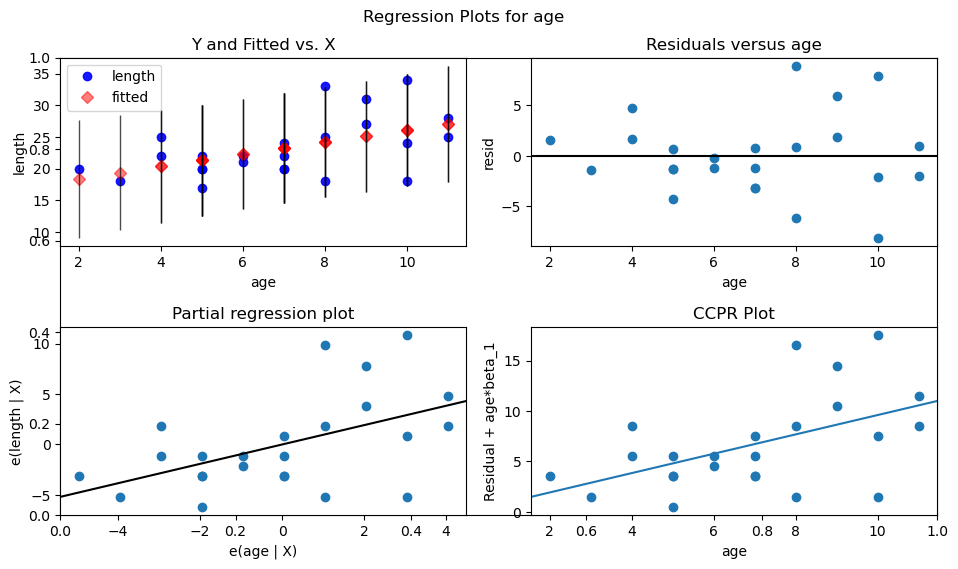

In [30]:
import matplotlib.pyplot as plt

# Assuming 'model' is your fitted regression model and 'X' contains predictor variables
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.plot_regress_exog(model, 'age', fig=fig)
plt.show()


The residuals appear to be increasing as the age increases

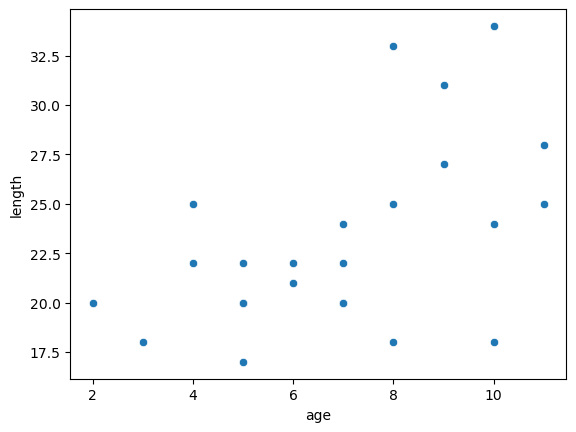

In [42]:
fig1, ax1 = plt.subplots()
ax1 = sns.scatterplot(data=age_kidney_df, x='age', y='length', ax=ax1)



<Axes: xlabel='age', ylabel='length'>

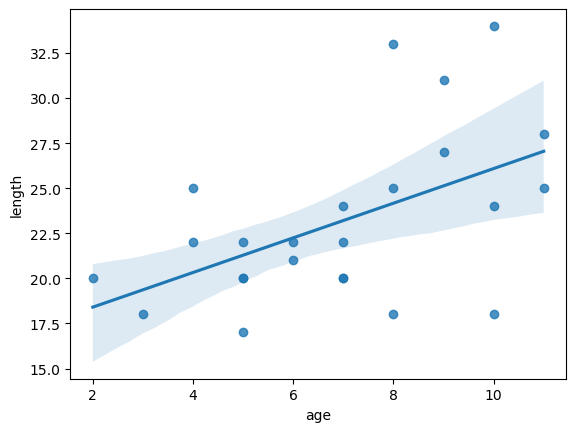

In [48]:
fig1, ax1 = plt.subplots()
sns.regplot(data=age_kidney_df, x='age', y='length', ax=ax1,  marker='o')

$$ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}

{\sqrt{\sum (x_i - \bar{x})^2{\sum (y_i - \bar{y})^2}}}

$$

## Retinal Permeability

In [51]:
retinal_perm_json = {
    19.5: 0.0,
    15.0: 38.0,
    13.5: 59.0,
    23.3: 119.2,
    6.3: 97.4,
    2.0: 129.5,
    1.8: 1987.0,
    1.8: 2487.0,
    1.8: 3180.0,
    1.8: 4385.0
}

retinal_perm_df = pd.DataFrame(retinal_perm_json.items(), columns=["Penetration", "ERG"])
retinal_perm_df

,Penetration,ERG
0,19.5,0.0
1,15.0,38.0
2,13.5,59.0
3,23.3,119.2
4,6.3,97.4
5,2.0,129.5
6,1.8,4385.0


## Homework

### 8-11